In [2]:
!pip install numpy==1.19.3
!pip install mediapipe

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


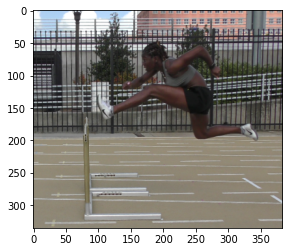

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  


image_path = "./sample_images/jump3.png"
img = cv2.imread(image_path)[:,:,::-1]
# cv2.imshow(img)
plt.imshow(img)

Nose coordinates: (171.02951431274414, 84.5266380906105)
Pose landmarks:


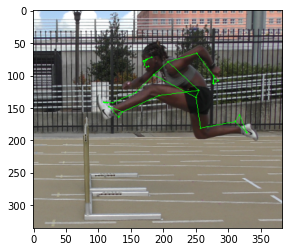

In [12]:
import mediapipe as mp
mp_pose = mp.solutions.pose

# Initialize MediaPipe Pose.
pose = mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5)

# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# Print nose landmark.
image_hight, image_width, _ = img.shape

print(
    f'Nose coordinates: ('
    f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
    f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
)

# Draw pose landmarks.
print(f'Pose landmarks:')
annotated_image = img.copy()
mp_drawing.draw_landmarks(
  image=annotated_image,
  landmark_list=results.pose_landmarks,
  connections=mp_pose.POSE_CONNECTIONS,
  landmark_drawing_spec=drawing_spec,
  connection_drawing_spec=drawing_spec)
#cv2_imshow(annotated_image)
plt.imshow(annotated_image)